In [ ]:
import numpy as np
import statsmodels
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns

In [11]:
df = pd.read_csv('C://Users//HP//Desktop//mandeep project//drinks.csv')
df

,country,beer servings,spirit servings,wine servings,total litres of pure alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer servings                 193 non-null    int64  
 2   spirit servings               193 non-null    int64  
 3   wine servings                 193 non-null    int64  
 4   total litres of pure alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [13]:
# Let's look at some statistical information about our dataframe.
df.describe()

,beer servings,spirit servings,wine servings,total litres of pure alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<AxesSubplot:>

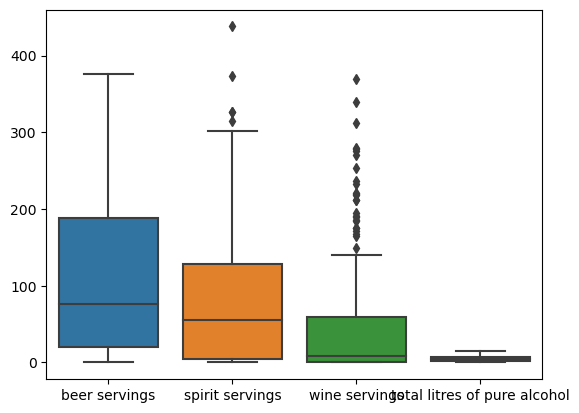

In [14]:
sns.boxplot(data=df)

beer servings                      AxesSubplot(0.125,0.712609;0.227941x0.167391)
spirit servings                 AxesSubplot(0.398529,0.712609;0.227941x0.167391)
wine servings                   AxesSubplot(0.672059,0.712609;0.227941x0.167391)
total litres of pure alcohol       AxesSubplot(0.125,0.511739;0.227941x0.167391)
dtype: object

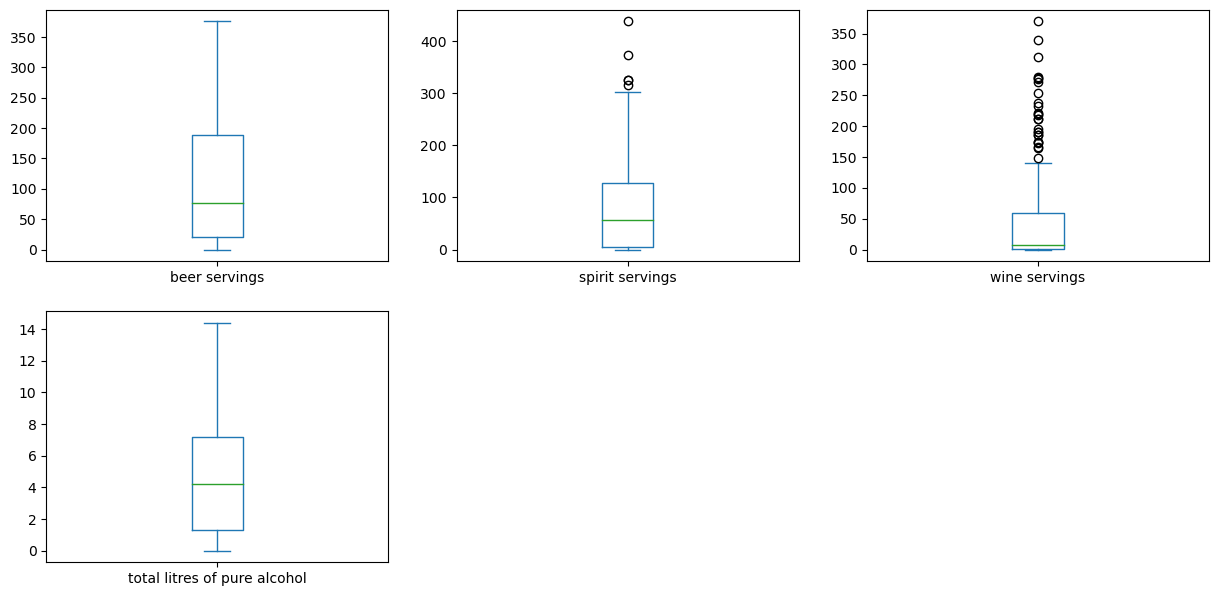

In [15]:
#BOX Plot

df.plot(kind = 'box',subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,15))

In [16]:
#Checking correlation

df.corr()

,beer servings,spirit servings,wine servings,total litres of pure alcohol
beer servings,1.000000,0.458819,0.527172,0.835839
spirit servings,0.458819,1.000000,0.194797,0.654968
wine servings,0.527172,0.194797,1.000000,0.667598
total litres of pure alcohol,0.835839,0.654968,0.667598,1.000000


<AxesSubplot:>

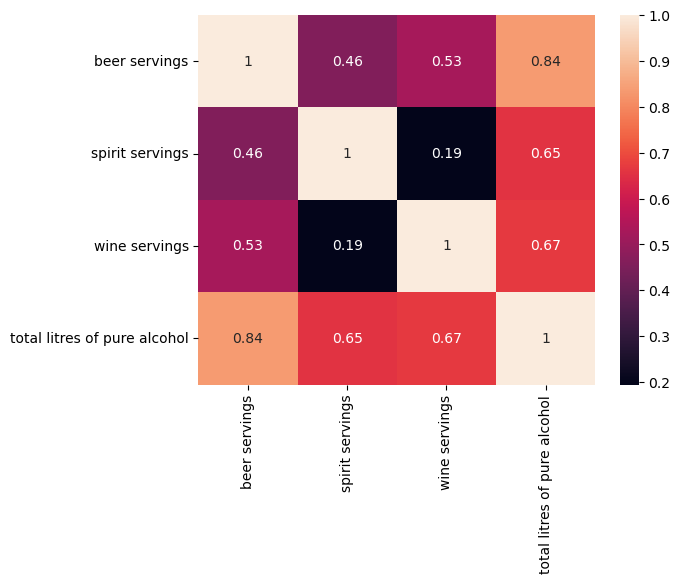

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot = True)

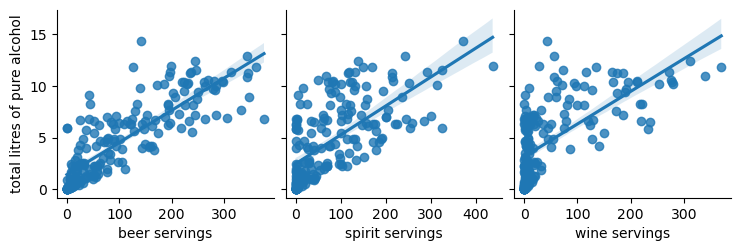

In [18]:
sns.pairplot(df,x_vars=["beer servings","spirit servings","wine servings"],y_vars="total litres of pure alcohol", kind='reg')

In [38]:
df.rename(columns = {'total litres of pure alcohol':'TotalLitresOfPureAlcohol', 'beer servings':'BeerServings','spirit servings' :'SpiritServings', 'wine servings': 'WineServings'}, inplace = True)
df.head()

,TotalLitresOfPureAlcohol,BeerServings,SpiritServings,WineServings
162,1.7,8,13,0
175,1.3,51,3,20
90,1.3,0,0,0
77,2.2,9,114,0
64,5.4,52,100,149


In [39]:
X = df[['BeerServings','SpiritServings','WineServings']]
Y = df['TotalLitresOfPureAlcohol']

In [40]:
#VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,BeerServings,3.29
1,SpiritServings,2.39
2,WineServings,1.77


array([[<AxesSubplot:title={'center':'BeerServings'}>,
        <AxesSubplot:title={'center':'SpiritServings'}>],
       [<AxesSubplot:title={'center':'WineServings'}>, <AxesSubplot:>]],
      dtype=object)

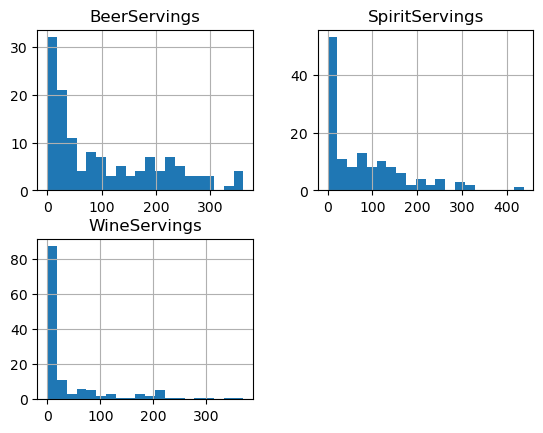

In [41]:
#Skewness histogram

X.hist(bins=20)

In [42]:
# Calculate Skewness value

from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

BeerServings      0.779272
SpiritServings    1.312425
WineServings      2.131226
dtype: float64
BeerServings      0.779272
SpiritServings    1.312425
WineServings      2.131226
dtype: float64


In [43]:
#Outlier Treatment

def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df2=cap_data(df)

capping the  TotalLitresOfPureAlcohol
capping the  BeerServings
capping the  SpiritServings
capping the  WineServings


C:\Users\HP\AppData\Local\Temp\ipykernel_11980\1964182131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_11980\1964182131.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\HP\AppData\Local\Temp\ipykernel_11980\1964182131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[co

TotalLitresOfPureAlcohol       AxesSubplot(0.125,0.712609;0.227941x0.167391)
BeerServings                AxesSubplot(0.398529,0.712609;0.227941x0.167391)
SpiritServings              AxesSubplot(0.672059,0.712609;0.227941x0.167391)
WineServings                   AxesSubplot(0.125,0.511739;0.227941x0.167391)
dtype: object

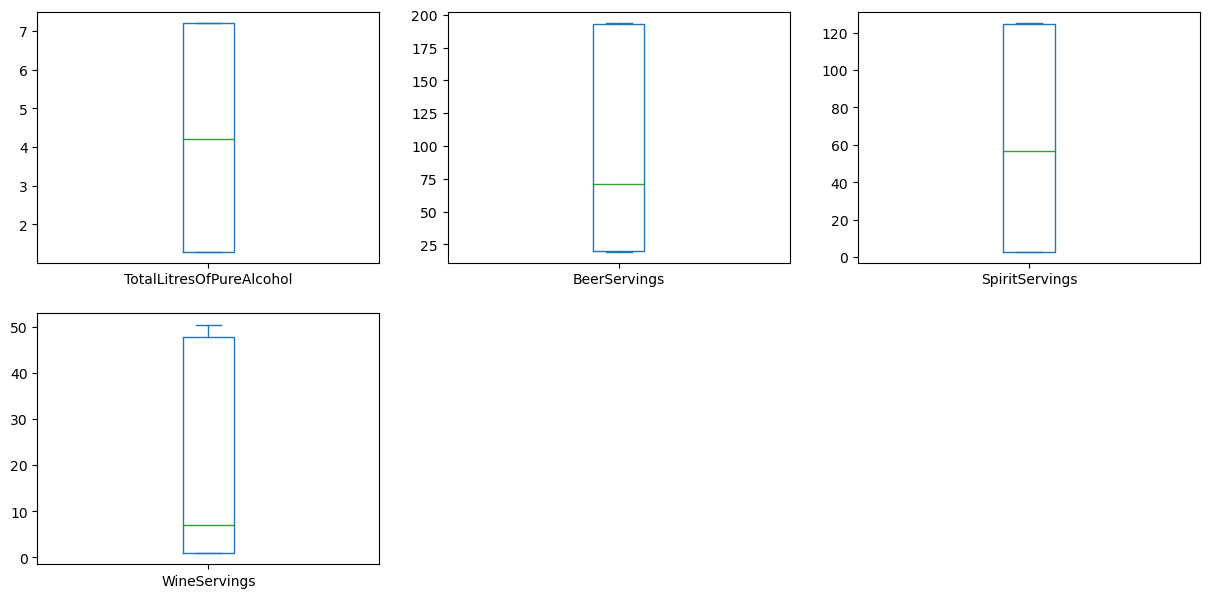

In [44]:
df.plot(kind = 'box',subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,15))

# Training and Testing

In [45]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7 , random_state=100)

In [46]:
df = pd.concat([Y_train, X_train], axis=1)
df.columns

Index(['TotalLitresOfPureAlcohol', 'BeerServings', 'SpiritServings',
       'WineServings'],
      dtype='object')

# Train Model Building

In [69]:
import statsmodels.formula.api as smf
model=smf.ols('TotalLitresOfPureAlcohol~ BeerServings + SpiritServings + WineServings',data=df).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     TotalLitresOfPureAlcohol   R-squared:                       0.874
Model:                                  OLS   Adj. R-squared:                  0.872
Method:                       Least Squares   F-statistic:                     437.7
Date:                      Thu, 26 Jan 2023   Prob (F-statistic):           8.74e-85
Time:                              14:49:03   Log-Likelihood:                -329.62
No. Observations:                       193   AIC:                             667.2
Df Residuals:                           189   BIC:                             680.3
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7224      0.149      4.841      0.000       0.428       1.017
BeerServings       0.0183      0.001     14.608      0.000       0.016       0.021
SpiritServings     0.0156      0.001     12.511      0.000       0.013       0.018
WineServings       0.0160      0.001     11.112      0.000       0.013       0.019
==============================================================================
Omnibus:                      162.898   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1593.746
Skew:                           3.394   Prob(JB):                         0.00
Kurtosis:                      15.333   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Accuracy of the model is 87.4%.
Adjusted R always<= R^2
F-statistics(calc)>prob(F statistice) - reject null hypothesis 
(there’s a significant relationship between the predictor variables and the response variable) 
p value<0.05 
Eq - TotalLitresOfPureAlcohol = 0.7224 + 0.0183(Beer Servings)+ 0.0156(Spirit Servings)+ 0.0160(Wine Servings) 

# Testing Step

In [52]:
print(X_test)

     BeerServings  SpiritServings  WineServings  \
61            127             151           370   
19             23               0             0   
109           238              68             5   
138           140              16             9   
105           149             100           120   
143           194             205            32   
124            42               5             2   
9             279              75           191   
22            173              35            35   
164            90               2             2   
25            231             252            94   
30             57              65             1   
141           247             326            73   
130           285             104            18   
8             261              72           212   
115            47              18             5   
87            124             246            12   
16            295              84           212   
181            16             1

# Prediction on Test Data

In [53]:
Y_pred=model.predict(X_test)
print(Y_pred )

61     8.054219
19     1.838434
109    5.302750
138    3.557276
105    5.553385
143    6.443597
124    2.147828
9      7.555669
22     4.405482
164    2.718619
25     7.960781
30     2.962950
141    8.757871
130    6.390537
8      7.485790
115    2.375184
87     5.820344
16     8.039770
181    3.225755
4      5.280424
95     2.886389
78     1.623062
133    5.479199
39     2.594896
54     2.951512
191    2.188528
86     1.856483
142    2.110700
80     1.694469
170    3.935884
68     8.939457
56     1.775665
91     3.020358
155    8.152660
118    2.236403
34     1.757546
50     5.465567
53     1.676351
129    6.264460
36     4.647454
0      1.549698
dtype: float64


# Building New Data with Actual and Predicted pH

In [54]:
new_df=pd.DataFrame()
new_df=X_test
new_df["Actual TotalLitresOfPureAlcohol"]=Y_test
new_df["Predicted TotalLitresOfPureAlcohol"]=Y_pred
print(new_df)

     BeerServings  SpiritServings  WineServings  \
61            127             151           370   
19             23               0             0   
109           238              68             5   
138           140              16             9   
105           149             100           120   
143           194             205            32   
124            42               5             2   
9             279              75           191   
22            173              35            35   
164            90               2             2   
25            231             252            94   
30             57              65             1   
141           247             326            73   
130           285             104            18   
8             261              72           212   
115            47              18             5   
87            124             246            12   
16            295              84           212   
181            16             1

# MSE & MAE & RMSE for evaluation of Model on test data 

In [71]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math
# calculate the mean squared error
model_mse = mean_squared_error(new_df['Actual TotalLitresOfPureAlcohol'],new_df['Predicted TotalLitresOfPureAlcohol'])
# calculate the mean absolute error
model_mae = mean_absolute_error(new_df['Actual TotalLitresOfPureAlcohol'],new_df['Predicted TotalLitresOfPureAlcohol'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.11
MAE 0.979
RMSE 1.45


Mean Absolute Error(MAE) - the MAE measures the average magnitude of errors, thus measuring the accuracy of continuous variables.
#It is a linear score which means that all individual differences are weighted equally in the average 

#Root Mean Square Error (RMSE) - RMSE is a quadratic scoring rule which measures the average magnitude of error. 
#The difference between forecast i.e predicted values corresponding to observed values i.e the actual values are each squared & then averaged over the sample.

#This is mean squared error, when we take the root it becomes RMSE

#NOTE - Since the errors are squared before they are averaged in RMSE it relatively gives high weight to large errors. 

#Thus RMSE are most useful when large errors are particulary undesirable. MAE & RMSE both are used together to diagnose the variation in errors of the forecast. RMSE will always be larger or equal to MAE. The greater the difference between them, the greater will be the variance in the individual errors of the sample.

#If RMSE=MAE then all the errors are of same magnitude. Both MAE & RMSE can range from 0 to infinity, lower the values are better, higher the accuracy of the model,lower should be the values of MAE & RMSE.

# Normality

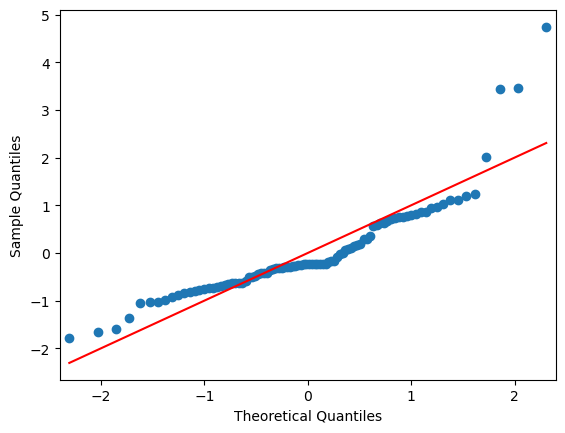

In [58]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()